### Denetimsiz/Gözetimsiz Öğrenme (Unsupervised Learning)

In [1]:
# pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Kmeans 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram # hiyerarşik kümeleme yöntemi
from sklearn.decomposition import PCA # temel bilesen yöntemi

In [3]:
df = pd.read_csv("USArrests.csv",index_col=0) # ilk sutun indeksi temsil eder bu yüzden ilk satırı indeks kolonu yaptık
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().any()

Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
# uzaklık temelli ve gradient descent temelli yöntemlerin kullanımındaki 
# süreçlerde değişkenleri standartlaştırılması önemlidir. KMeans de bunlardan biri.

mms = MinMaxScaler((0,1))
df = mms.fit_transform(df) # dataframe fit_transform edildiğinde artık nump array'e dönüşür
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

### KMeans

In [8]:
k_means = KMeans(n_clusters=4,random_state=17).fit(df) 
# sadece bağımsızlarla yani direkt veri seti ile fit edilir
# n_clusters yani küme sayısını 4 verdik

In [9]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [10]:
k_means.n_clusters # kac adet küme var

4

In [11]:
k_means.cluster_centers_ # bu kumelerin dört değişken için merkez değerleri

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [12]:
k_means.labels_ # değişkenlere karşılık gelen kümeler (kümeler 0, 1, 2 ve 3 olarak isimlenmiş)

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [13]:
k_means.inertia_ # SSE/SSR/SSD (literatürde sahip oldugu bazı isimler) değeri

3.683456153585913

#### Optimum Küme Sayısını Belirleme

In [14]:
kmeans = KMeans()
ssd = []
K = range(1,30)

In [15]:
for i in K:
    kmeans = KMeans(n_clusters = i).fit(df)
    ssd.append(kmeans.inertia_)

C:\Users\seyma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
ssd

[13.184122550256443,
 6.5968938679461955,
 5.010878493006417,
 3.683456153585913,
 3.1842618139677223,
 2.8566826167870354,
 2.6436115146069796,
 2.3268788028371215,
 2.0512635222757623,
 1.8520668866823122,
 1.6449550018456156,
 1.5128770120345612,
 1.466319988891884,
 1.3214402631883462,
 1.1963893808717838,
 1.1772775141616973,
 1.115296647579984,
 1.0042997135301428,
 0.9259084688074195,
 0.8664448786384888,
 0.8111834459611174,
 0.730163343043775,
 0.6710523771573194,
 0.603860752664159,
 0.5692371673416986,
 0.5472017569113892,
 0.48309409617720156,
 0.4524187262892958,
 0.4261064284127917]

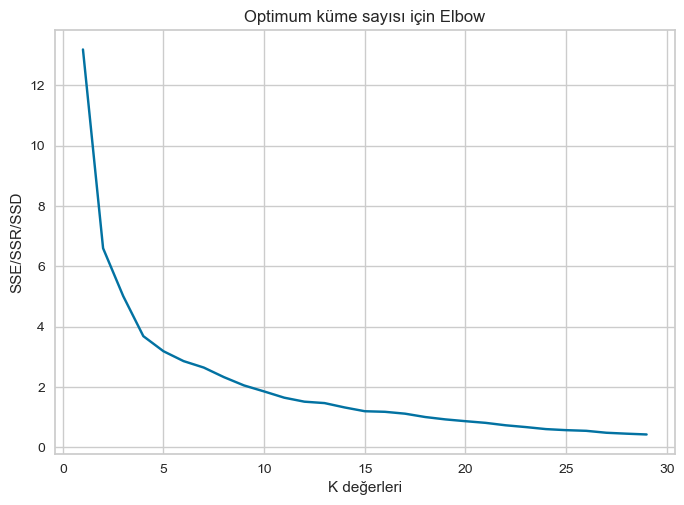

In [17]:
plt.plot(K,ssd,"bx-")
plt.xlabel("K değerleri")
plt.ylabel("SSE/SSR/SSD")
plt.title("Optimum küme sayısı için Elbow")
plt.show()

In [18]:
#### küme sayısı arttıkça SSE/SSR/SSD değeri düşer. 
#### Ancak gözlem birimi kadar cluster olursa her değer tekil küme olmaya başlar. 
#### Bu yüzden sadece SSE/SSR/SSD değerine bakılarak küme sayısı seçilmez. 
#### Sadece bize bir karar yolu verir.

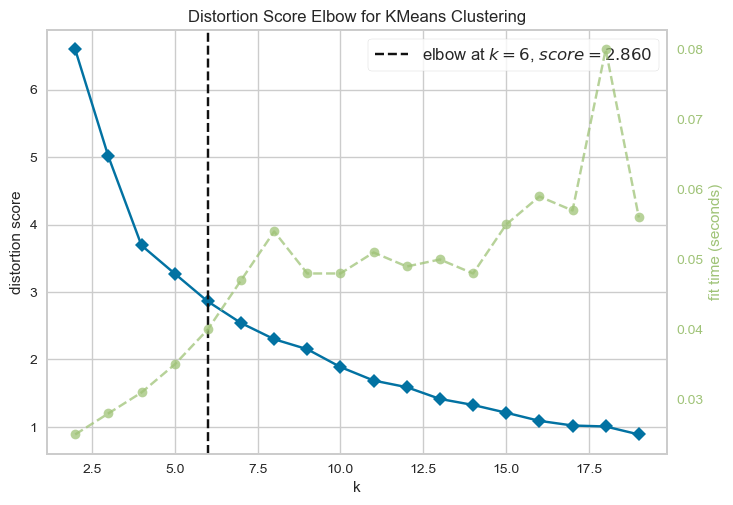

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show()

In [20]:
elbow.elbow_value_
## küme sayısının 6 olmasını önerdi
## eğrinin şiddetlendiği nokta

6

#### Final KMeans

In [21]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [22]:
clusters = kmeans.labels_

In [23]:
df = pd.read_csv("USArrests.csv",index_col=0) 
df["clusters"] = clusters 

In [24]:
df["clusters"] = df.clusters + 1

In [25]:
df[df.clusters==5]

,Murder,Assault,UrbanPop,Rape,clusters
Idaho,2.6,120,54,14.2,5
Iowa,2.2,56,57,11.3,5
Maine,2.1,83,51,7.8,5
Minnesota,2.7,72,66,14.9,5
Montana,6.0,109,53,16.4,5
New Hampshire,2.1,57,56,9.5,5
North Dakota,0.8,45,44,7.3,5
South Dakota,3.8,86,45,12.8,5
Vermont,2.2,48,32,11.2,5
West Virginia,5.7,81,39,9.3,5


In [26]:
df.groupby("clusters").agg(["count","mean","median"])
# standartlaştırma yaptığımız için oluşan kümelere güvenebiliriz kayda değer 
# ancak çıkarım yapılmalı
# mean ve median değerleri birbirine yakın olanları birleştirebiliriz, 
# önemli olan özelliğe karar vererek ona ait değerlere göre birleşme yapılabilir
# sadece algoritmanın verdiğine bakılmamalı, betimlenmeli

Murder                   Assault                    UrbanPop  \
          count       mean median   count        mean median    count   
clusters                                                                
1             7   4.757143    4.4       7  123.428571  120.0        7   
2             5  10.240000   10.0       5  250.000000  255.0        5   
3            13   6.846154    6.8      13  149.000000  151.0       13   
4             7  14.671429   14.4       7  251.285714  249.0        7   
5            11   2.981818    2.6      11   73.636364   72.0       11   
6             7  11.485714   11.3       7  274.000000  285.0        7   

                            Rape                    
               mean median count       mean median  
clusters                                            
1         81.857143   83.0     7  16.071429   16.3  
2         74.400000   78.0     5  40.980000   40.6  
3         64.846154   66.0    13  20.653846   20.0  
4         54.285714   58.0     7  21.685714   22.2  
5         51.181818   53.0    11  11.409091   11.2  
6         78.000000   80.0     7  28.342857   27.8

In [27]:
df.to_csv("cluster.csv")